In [8]:
# Exploratory data analysis
# understand the shape of the data | learn which features might be useful 
# | inform the cleaning that will come next
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
titanic = pd.read_csv('titanic.csv')

In [9]:
# By reading the types of data we have, we noticed that some data types
# such as name, ticket number and passengerID. So we decided to drop them
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
# Hint: axis = 0 drops the rows, axis = 1 drops the columns
# inplace method is for using the same data frame, we do not want to create a new data frame
# head method in pandas, default value is 5
print(titanic.head())

   Survived  Pclass   Age  SibSp  Parch     Fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


In [10]:
print(titanic.describe())
# We found out that the count of age is less than all the other counts.
# We immediately know that there is missing age data

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [11]:
# To know what is the strong feature for determining whether someone survived or not.
# groupby the two levels of survive(0 did not survive and 1 did survive), generate the average
# value of the other features at those two levels of the target variable.
# To find out what feature stands out.
print(titanic.groupby('Survived').mean())

            Pclass        Age     SibSp     Parch       Fare
Survived                                                    
0         2.531876  30.626179  0.553734  0.329690  22.117887
1         1.950292  28.343690  0.473684  0.464912  48.395408


In [12]:
# Remember age has missing data, we want to know if the data is missing at random like
# it is never reported for certain people or missing in a systematic way, like they did not
# ask the age of a certain group or people. This is important because it will inform us
# how we handle these missing values.

# grouping by age and using is null method to get true or false based on whether a row has
# a missing value for age. True means have missing value, false means no.
print(titanic.groupby(titanic['Age'].isnull()).mean())

       Survived    Pclass        Age     SibSp     Parch       Fare
Age                                                                
False  0.406162  2.236695  29.699118  0.512605  0.431373  34.694514
True   0.293785  2.598870        NaN  0.564972  0.180791  22.158567


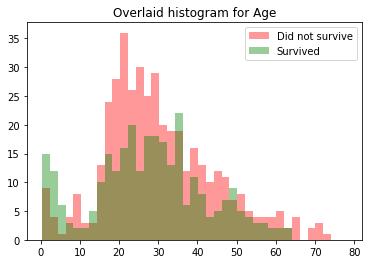

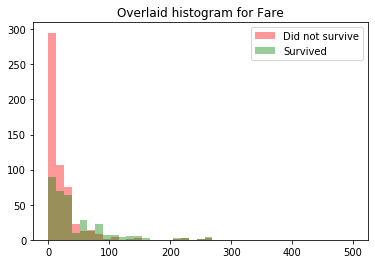

In [13]:
# Hint:
# Ordinal variables are variables that have two or more categories just like nominal variables
# only the categories can also be ordered or ranked.
# Continuous variables are numeric variables that have an infinite number of values between any
# two values. A continuous variable can be numeric or date/time.

# Focus on continuous variables in this case age and fare to visualize the features
# using dropna to remove missing values
for i in ['Age', 'Fare']:
    # Removing missing values in 0 survived and 1 survived, and get two lists of them
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    # Get the min values of died and survived
    xmin = min(min(died), min(survived))
    # Get the max values of died and survived
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    # Plotting out the overlayed histogram
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 432x288 with 0 Axes>

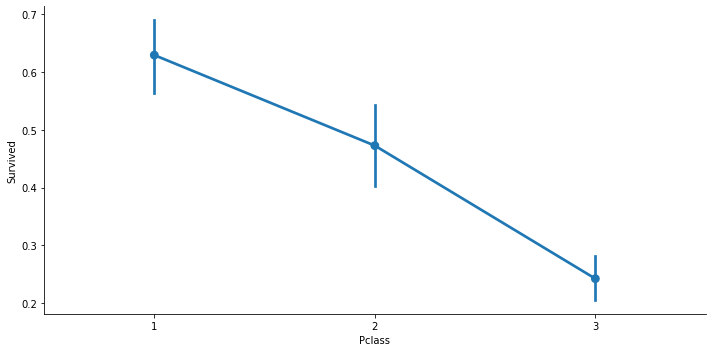

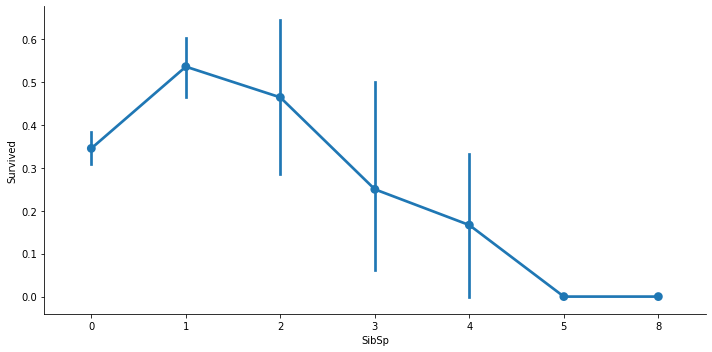

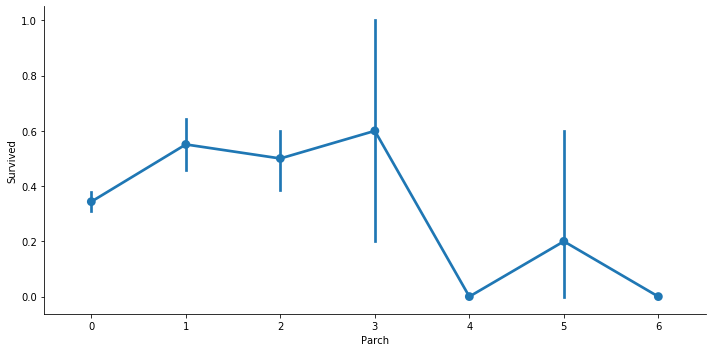

In [14]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    # figure is used for creating plot
    plt.figure(i)
    # aspect: scalar
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

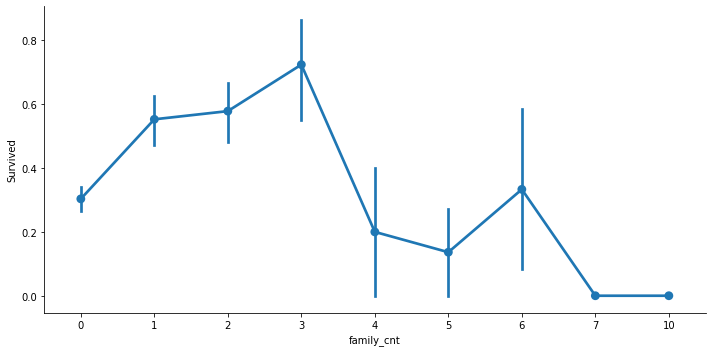

In [15]:
    # Based on the trend we discovered above, they are similar. the more family member you have
    # the less likely that you are going to survive.
    # So it is a good idea if we merge them together into a single feature.
    titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch']
    sns.catplot(x='family_cnt', y='Survived', data=titanic, kind='point', aspect=2,)

In [16]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')
# PassengerId is irrelevant in this case
# axis is 1 means drop column
# in place: stay the same dataset, noting new is being made
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Fill missing for Age
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [18]:
# Fill out the missing age value with the mean age value, so the data is not biased
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
# Fine out where are the missing values
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [19]:
# Check is the missing value now the average value of the ages
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [20]:
# Combine SibSp & Parch
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
# Now the family cnt is the representitive of the both features, it becomes repetitive --- multicollinearity 
# The model would have a hard to to assign values to all of these features cause they all look the same to the
# model. It has negative consequences on the performance of the model.
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [22]:
# Drop all continuous features 
cont_feat = ['Pclass','Name','Age','Fare','Family_cnt']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [24]:
# Now explore categorical features
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Sex         891 non-null object
Ticket      891 non-null object
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [25]:
# we can see some 891 but for cabin and embarked there are missing values.
titanic.groupby(titanic['Cabin'].isnull()).mean()
# No we see that for cabin there are too many missing values, so it is not worth it to averge the value in, 
# we just drop cabin.
# however the useful information here is the big gap between have cabin survived and do not have cabin survived.
# so this is useful

,Survived
Cabin,
False,0.666667
True,0.299854


In [27]:
# binary checking do they have a cabin
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


<Figure size 432x288 with 0 Axes>

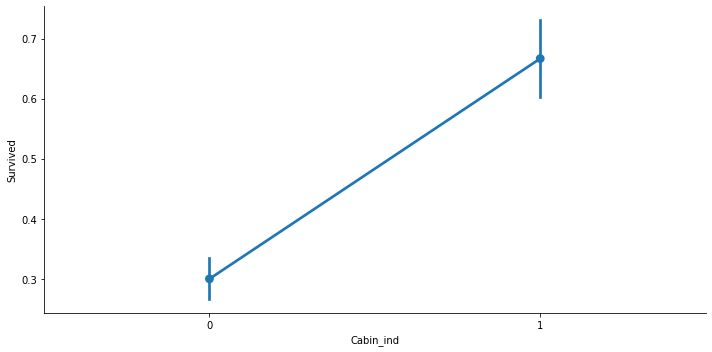

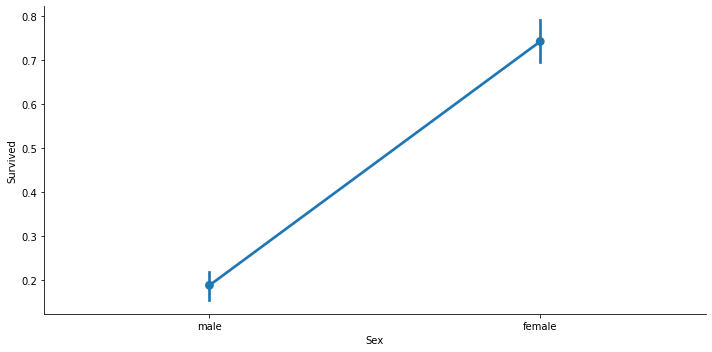

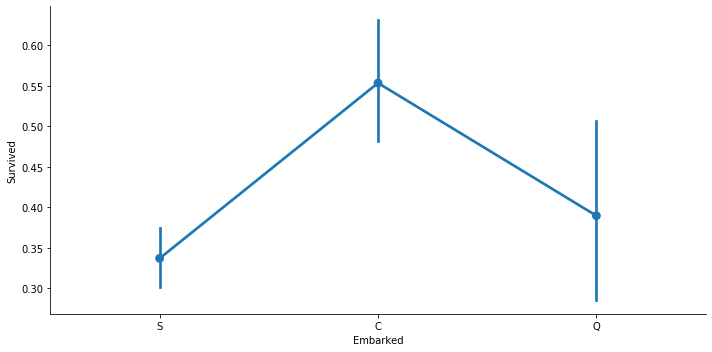

In [28]:
# Plot categorical feature
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)

In [29]:
# pivot table used to compare between multiple features
titanic.pivot_table('Survived', index='Sex', columns='Embarked',aggfunc='count')
# the big difference in sex in S proves that female is more likely to survive.

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [31]:
titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked',aggfunc='count')
# the big difference in cabin in Q and S show that people with cabin are more likely to survive.

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


In [33]:
# Finally cleaning the data after the whole learning process
import numpy as np
import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [34]:
# Convert indicator for Cabin
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


In [35]:
# Convert Sex to numeric
# numeric is easier for model to handle
gender_num = {'male': 0 , 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,71.2833,C85,C,1
2,3,1,3,1,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,1,35.0,1,0,53.1000,C123,S,1
4,5,0,3,0,35.0,0,0,8.0500,NaN,S,0


In [36]:
# Drop cabin and embarked
titanic.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin_ind
0,1,0,3,0,22.0,1,0,7.2500,0
1,2,1,1,1,38.0,1,0,71.2833,1
2,3,1,3,1,26.0,0,0,7.9250,0
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,0
